In [62]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [63]:
# 데이터 불러오기 (csv, xlsx)

df = pd.read_csv("C:/ai/car.data",header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [64]:
for i in range(7):
    df[i]=LabelEncoder().fit_transform(df[i])

df.columns =["buying","maint","doors","persons","lug_boot","safety","class"]
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [65]:
for i in ["buying","maint","doors","persons","lug_boot","safety","class"]:
    print(df[i].value_counts())

3    432
0    432
2    432
1    432
Name: buying, dtype: int64
3    432
0    432
2    432
1    432
Name: maint, dtype: int64
0    432
1    432
2    432
3    432
Name: doors, dtype: int64
0    576
1    576
2    576
Name: persons, dtype: int64
2    576
1    576
0    576
Name: lug_boot, dtype: int64
1    576
2    576
0    576
Name: safety, dtype: int64
2    1210
0     384
1      69
3      65
Name: class, dtype: int64


In [66]:
# 데이터 정규화
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()
for i in ["buying","maint","doors","persons","lug_boot","safety","class"]:
    df[i]=scaler.fit_transform(df[i])
df

ValueError: Expected 2D array, got 1D array instead:
array=[3. 3. 3. ... 1. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [52]:
# 데이터 분류

X=df.drop('class',axis=1)
y=df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
print(X.head())
print(y.value_counts())

   buying  maint  doors  persons  lug_boot  safety
0       3      3      0        0         2       1
1       3      3      0        0         2       2
2       3      3      0        0         2       0
3       3      3      0        0         1       1
4       3      3      0        0         1       2
2    1210
0     384
1      69
3      65
Name: class, dtype: int64

3    432
0    432
2    432
1    432
Name: buying, dtype: int64
3    432
0    432
2    432
1    432
Name: maint, dtype: int64
0    432
1    432
2    432
3    432
Name: doors, dtype: int64
0    576
1    576
2    576
Name: persons, dtype: int64
2    576
1    576
0    576
Name: lug_boot, dtype: int64
1    576
2    576
0    576
Name: safety, dtype: int64
2    1210
0     384
1      69
3      65
Name: class, dtype: int64


array([[ 1.34164079,  1.34164079, -1.34164079, ...,  1.22474487,
         0.        ,  0.51017691],
       [ 1.34164079,  1.34164079, -1.34164079, ...,  1.22474487,
         1.22474487,  0.51017691],
       [ 1.34164079,  1.34164079, -1.34164079, ...,  1.22474487,
        -1.22474487,  0.51017691],
       ...,
       [-0.4472136 , -0.4472136 ,  1.34164079, ..., -1.22474487,
         0.        ,  0.51017691],
       [-0.4472136 , -0.4472136 ,  1.34164079, ..., -1.22474487,
         1.22474487, -0.63177348],
       [-0.4472136 , -0.4472136 ,  1.34164079, ..., -1.22474487,
        -1.22474487,  1.65212731]])

In [ ]:
# 결측치 직관확인

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [26]:
# classification 4종 import

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [27]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)

print ("\n--- Radom Forest ---")
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))


--- Radom Forest ---
0.9745370370370371
[[ 95   3   1   0]
 [  2  19   0   0]
 [  3   0 293   0]
 [  2   0   0  14]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        99
           1       0.86      0.90      0.88        21
           2       1.00      0.99      0.99       296
           3       1.00      0.88      0.93        16

    accuracy                           0.97       432
   macro avg       0.95      0.93      0.94       432
weighted avg       0.98      0.97      0.97       432



In [28]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_dt))


--- Decision Tree Classifier ---
0.9768518518518519
[[ 92   4   3   0]
 [  0  21   0   0]
 [  2   0 294   0]
 [  1   0   0  15]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        99
           1       0.84      1.00      0.91        21
           2       0.99      0.99      0.99       296
           3       1.00      0.94      0.97        16

    accuracy                           0.98       432
   macro avg       0.95      0.97      0.96       432
weighted avg       0.98      0.98      0.98       432



In [29]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_lr))


--- Logistic Regression Classifier ---
0.6550925925925926
[[ 11   0  84   4]
 [  1   0  20   0]
 [ 24   0 269   3]
 [  4   0   9   3]]
              precision    recall  f1-score   support

           0       0.28      0.11      0.16        99
           1       0.00      0.00      0.00        21
           2       0.70      0.91      0.79       296
           3       0.30      0.19      0.23        16

    accuracy                           0.66       432
   macro avg       0.32      0.30      0.30       432
weighted avg       0.56      0.66      0.59       432



C:\Users\1563a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1563a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1563a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- KNeighborsRegressor ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_lr))


--- KNeighborsRegressor ---
0.6550925925925926
[[ 11   0  84   4]
 [  1   0  20   0]
 [ 24   0 269   3]
 [  4   0   9   3]]
              precision    recall  f1-score   support

           0       0.28      0.11      0.16        99
           1       0.00      0.00      0.00        21
           2       0.70      0.91      0.79       296
           3       0.30      0.19      0.23        16

    accuracy                           0.66       432
   macro avg       0.32      0.30      0.30       432
weighted avg       0.56      0.66      0.59       432



C:\Users\1563a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1563a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1563a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
X=df.drop('class',axis=1).values
y = pd.get_dummies(df['class']).values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=12)

print(X_train.shape)
print(y_train.shape)

(1382, 6)
(1382, 4)


In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(30,input_shape=(X_train.shape[1],),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(y_train.shape[1],activation='softmax'))

#model.compile(Adam(learning_rate=0.04),'binary_crossentropy',metrics=['accuracy'])
model.compile(Adam(learning_rate=0.02),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\1563a\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 30)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            84 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 914 (3.57 KB)

 Trainable params: 914 (3.57 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9778 - loss: 0.0667 - val_accuracy: 0.9712 - val_loss: 0.1071
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9825 - loss: 0.0538 - val_accuracy: 0.9712 - val_loss: 0.1073
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9884 - loss: 0.0444 - val_accuracy: 0.9784 - val_loss: 0.1057
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9772 - loss: 0.0618 - val_accuracy: 0.9856 - val_loss: 0.1967
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9763 - loss: 0.0607 - val_accuracy: 0.9784 - val_loss: 0.1070
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9665 - loss: 0.0816 - val_accuracy: 0.9712 - val_loss: 0.1179
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9743 - loss: 0.0582 - val_accuracy: 0.9712 - val_loss: 0.1741
Epoch 8/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9845 - loss: 0.0477 - val_accuracy: 0.9712 - val_loss:

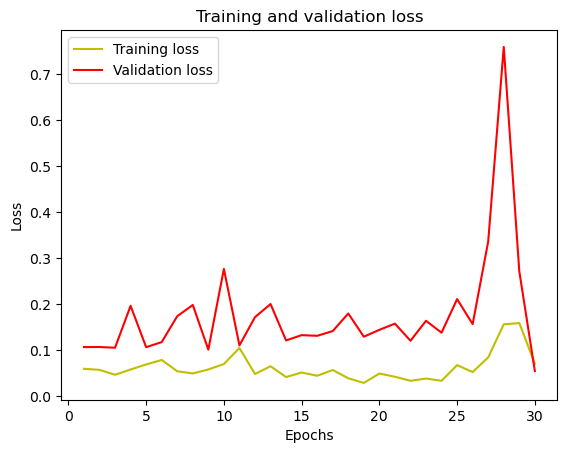

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        74
           1       1.00      0.72      0.84        18
           2       1.00      0.97      0.99       245
           3       0.69      1.00      0.82         9

    accuracy                           0.97       346
   macro avg       0.90      0.92      0.90       346
weighted avg       0.97      0.97      0.97       346

[[ 74   0   0   0]
 [  1  13   0   4]
 [  7   0 238   0]
 [  0   0   0   9]]
